## Combining Smart Factors Momentum

### Factor 선정
논문에 나와있는 Factor를 모두 선정하는 건 어려워서, 투자 가능한 ETF의 추종 지수 선정

1. [모멘텀] FnGuide 스마트 모멘텀 (ETF: Kindex 스마트 모멘텀)
2. [밸류] FnGuide 스마트 밸류 (ETF: Kindex 스마트 밸류)
3. [퀄리티] FnGuide 스마트 퀄리티 (ETF: Kindex 스마트 퀄리티)
4. [로우볼] FnGuide 스마트 로우볼 (ETF: Kindex 스마트 로우볼)
5. [하이베타] FnGuide 스마트 하이베타 (ETF: Kindex 스마트 하이베타)

각 지수 간단 설명

FnGuide 스마트전략형 지수 시리즈
  - Momentum 전략(FnGuide 스마트 모멘텀 지수), 
  - Value 전략(FnGuide 스마트 밸류 지수), 
  - Quality 전략(FnGuide 스마트 퀄리티 지수), 
  - Low Volatility 전략(FnGuide 스마트 로우볼 지수), 
  - High Beta 전략(FnGuide 스마트 하이베타 지수) 의 5개 지수로 구성

유니버스 : 코스피 유동시총 상위 200종목

각 지수의 지표값과 유동시가총액을 반영한 최적화법(Optimization)을 이용하여 시장과의 괴리를 낮추면서 장기적인 초과수익을 추구하는 지수

#### A. Momentum 전략 지수

동일 업종에 속한 종목들의 수익률은 장기적으로 업종군의 평균 성과에 수령한다는 가정하에, 개별종목의 유니버스 대비 모멘텀과 속한 업종군 대비 모멘텀을 계산하여 종목을 선정합니다. 유니버스대비 모멘텀이 높으나, 업종 대비 모멘텀이 낮은 종목들은 업종 평균에 맞춰 추가 상승 여력이 있다고 가정하여 롱 포지션을 취하고, 유니버스 대비 모멘텀이 낮으나, 업종 대비 모멘텀이 높은 종목들은 업종 평균에 맞춰 하락할 가능성이 있다고 가정하여 숏 포지션을 취하여 지수를 구성합니다.

#### B. Value 전략 지수

DCF(Discounted Cash Flow) 밸류에이션 모델 중의 하나인, RIM 모델을 이용하여 향후 발생할 Residual Income(잉여 이익)을 할인하여 개별 종목의 적정 가치를 계산해, 현재 주가와 RIM 모델을 이용해 계산한 적정 가치의 밸류에이션 값 간의 괴리가 큰 저평가 종목을 우선 편입하여 구성하는 지수입니다.

#### C. Quality 전략 지수

퀄리티 투자는 기업의 안정적인 이익실현의 측면과 퀄리티 스타일 측면의 두 가지 컨셉이 혼재되어 있는데 본 지수에서는 후자에 포커스를 두어 퀄리티 스타일 팩터를 결합하여 기업을 평가합니다. 팩터는 높은 ROIC 및 유동주식비율, 낮은 부채비율로 구성되어 있으며, 안정적인 재무구조와
지속가능한 수익력을 보유한 종목들을 편입하여 구성하는 지수입니다.

#### D. Low Volatility 전략 지수

경기의 변동성이 심한 시장에서 상대적으로 주가 변동성이 낮은 종목들에 분산 투자하는 전략은 포트폴리오의 위험성을 낮추고 장기적으로 시장 초과 수익률을 기대할 수 있게 합니다. 유니버스에서 상대적으로 변동성이 낮은 종목들을 지수에 편입하여 적은 위험성으로 꾸준한 초과수익을 달성할 수 있도록 구성한 지수입니다.

#### E. High Beta 전략 지수

베타가 높은 기업은 시장의 움직임에 대해 민감하게 반응하며, 시장이 상승할 때 더 큰 폭으로 수익을 낼 수 있습니다. 유니버스 내 종목들과 코스피200 지수의 베타 값을 산출하여 베타가 높은 종목들을 지수에 편입하여, 시장이 상승장에 들어설 때 보다 큰 수익을 얻을 수 있도록 지수를 구성하였습니다.

URL:
http://file.fnguide.com/fnindex/FnGuide_KIM_Smart_Strategy_Index_Series_Methodology_Book_%ED%95%9C%ED%88%AC_(20190701)_v3.2.pdf

## 1. 종가 가져오기

In [91]:
# pykrx 이용
# !pip install pykrx
from pykrx import stock
import pandas as pd
import numpy as np
import scipy

In [3]:
# Kindex 스마트 ETF
# 종목코드
# '322120' 퀄리티 - 상장일 : 20190416
# '322130' 로우볼 - 상장일 : 20190416
# '322150' 하이베타 - 상장일 : 20190416
# '272230' 밸류 - 상장일 : 20170711
# '272220' 모맨텀 - 상장일 : 20170711
# => 20190416 부터 시뮬레이션 가능

# 해당시점에 상장되어있는지 티커 확인
tickers = stock.get_etf_ticker_list("20190416")
names = []
for ticker in tickers:
    names.append(stock.get_etf_ticker_name(ticker))
df_tickers = pd.DataFrame([x for x in zip(tickers, names) ])


In [4]:
df_tickers.head()

,0,1
0,292340,마이티 200커버드콜ATM레버리지
1,159800,마이티 코스피100
2,285000,KBSTAR 200IT
3,287300,KBSTAR 200건설
4,287310,KBSTAR 200경기소비재


In [5]:
# Column 명 바꾸기
df_tickers = df_tickers.rename(columns={0:'종목코드', 1:'종목명'})

In [6]:
# 확인
df_tickers.head()

,종목코드,종목명
0,292340,마이티 200커버드콜ATM레버리지
1,159800,마이티 코스피100
2,285000,KBSTAR 200IT
3,287300,KBSTAR 200건설
4,287310,KBSTAR 200경기소비재


In [7]:
# 우리의 ETF 있는지 확인
# str.contains 메서드 사용
df_tickers[df_tickers['종목명'].str.contains('스마트')]
# 확인 완료

,종목코드,종목명
314,322130,KINDEX 스마트로우볼
315,272220,KINDEX 스마트모멘텀
316,272230,KINDEX 스마트밸류
317,322120,KINDEX 스마트퀄리티
318,322150,KINDEX 스마트하이베타
350,238670,ARIRANG 스마트베타Quality채권혼합


In [8]:
# 벤치마크 지수 있는지 확인
df_tickers[df_tickers['종목명']=='KODEX 200']

,종목코드,종목명
253,069500,KODEX 200


In [9]:
df_tickers[df_tickers['종목명'].str.contains('스마트')].iloc[:5]

,종목코드,종목명
314,322130,KINDEX 스마트로우볼
315,272220,KINDEX 스마트모멘텀
316,272230,KINDEX 스마트밸류
317,322120,KINDEX 스마트퀄리티
318,322150,KINDEX 스마트하이베타


In [10]:
df = df_tickers[df_tickers['종목명'].str.contains('스마트')].iloc[:5]

In [11]:
df.head()

,종목코드,종목명
314,322130,KINDEX 스마트로우볼
315,272220,KINDEX 스마트모멘텀
316,272230,KINDEX 스마트밸류
317,322120,KINDEX 스마트퀄리티
318,322150,KINDEX 스마트하이베타


In [12]:
df = df.append(df_tickers[df_tickers['종목명']=='KODEX 200'])

C:\Users\lbc06\AppData\Local\Temp\ipykernel_41756\357605503.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tickers[df_tickers['종목명']=='KODEX 200'])


In [13]:
df

,종목코드,종목명
314,322130,KINDEX 스마트로우볼
315,272220,KINDEX 스마트모멘텀
316,272230,KINDEX 스마트밸류
317,322120,KINDEX 스마트퀄리티
318,322150,KINDEX 스마트하이베타
253,069500,KODEX 200


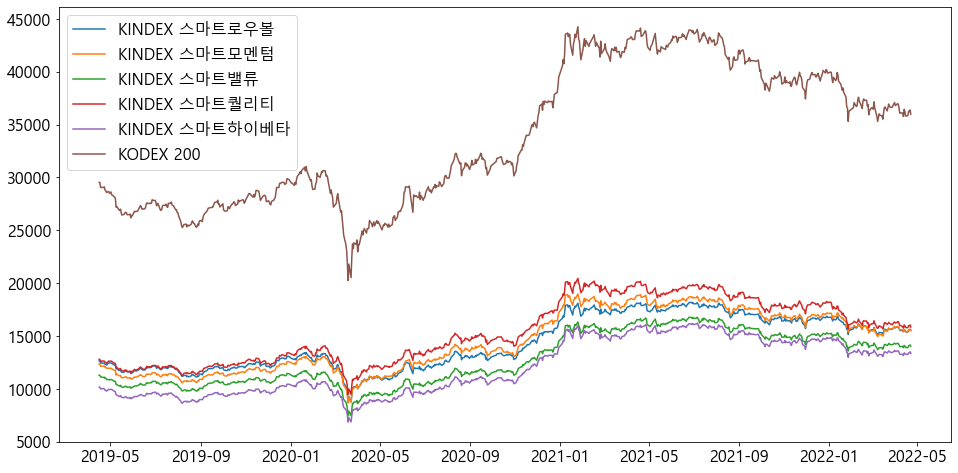

In [14]:
# 데이터 시각화
stocks = dict()
legend = []
for a, b in df[['종목명', '종목코드']].itertuples(index=False):
    price = stock.get_etf_ohlcv_by_date("20190416", "20220423", b)
    stocks[a] = price['종가'].values[:].tolist()
    legend.append(a)
prices = pd.DataFrame(stocks)
prices.index = price.index

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.plot(prices)
plt.legend(legend, loc='upper left')

In [15]:
# 수익률로 비교해보자
prices.head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 200
날짜,,,,,,
2019-04-16,12645,12330,11290,12800,10175,29535
2019-04-17,12590,12305,11275,12775,10145,29515
2019-04-18,12420,12145,11115,12580,9975,29045
2019-04-19,12435,12150,11110,12615,10010,29050
2019-04-22,12430,12140,11070,12630,10020,29055


In [16]:
prices.iloc[0]

KINDEX 스마트로우볼     12645
KINDEX 스마트모멘텀     12330
KINDEX 스마트밸류      11290
KINDEX 스마트퀄리티     12800
KINDEX 스마트하이베타    10175
KODEX 200         29535
Name: 2019-04-16 00:00:00, dtype: int64

In [17]:
prices/prices.iloc[0]

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 200
날짜,,,,,,
2019-04-16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-04-17,0.995650,0.997972,0.998671,0.998047,0.997052,0.999323
2019-04-18,0.982206,0.984996,0.984500,0.982812,0.980344,0.983410
2019-04-19,0.983393,0.985401,0.984057,0.985547,0.983784,0.983579
2019-04-22,0.982997,0.984590,0.980514,0.986719,0.984767,0.983748
...,...,...,...,...,...,...
2022-04-18,1.215896,1.247770,1.230292,1.233203,1.301720,1.213306
2022-04-19,1.229735,1.263179,1.246236,1.246484,1.316953,1.227527
2022-04-20,1.231712,1.261557,1.247564,1.246484,1.317445,1.226511


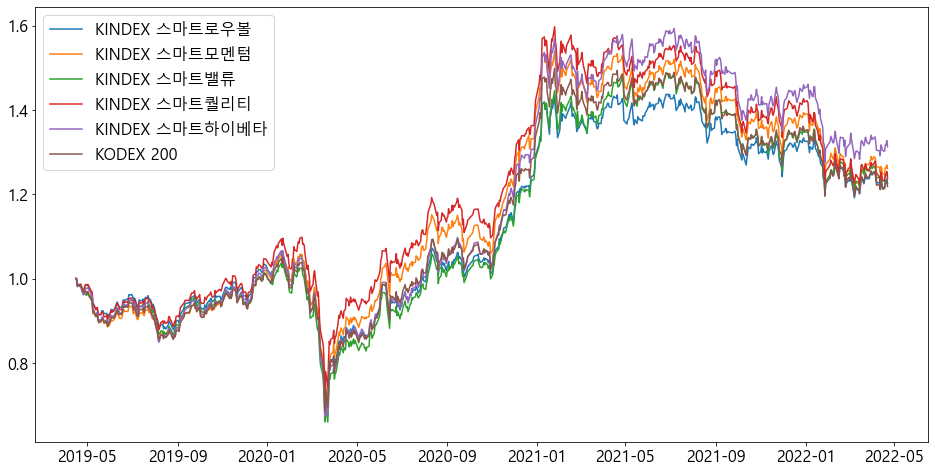

In [18]:
df_cumret = prices/prices.iloc[0]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.plot(df_cumret)
plt.legend(legend, loc='upper left')

In [19]:
# 상관관계가 너무 높아 다른 ETF의 차트 및 수익률을 보자
# FnGuide 고배당 Plus (ETF : KODEX 고배당, 20171017)
# FnGuide 모멘텀 Plus (ETF : KODEX 모멘텀Plus, 20160513)
# FnGuide 퀄리티 Plus (ETF : KODEX 퀄리티Plus, )
# FnGuide 밸류 Plus (ETF : KODEX 밸류Plus, )

# FnGuide 컨트래리안 (ETF : TIGER 가격조정, 20150428)
# 유가증권시장 및 코스닥시장 상장종목 시가총액 상위 300위 이내 종목 중, 
# 정기변경 시점 기준으로 최근 2년간 수익률 상위 60종목 중에서 최근 1개월간 수익률 하락폭이 큰 30종목으로 
# 지수 구성


In [20]:
df_tickers[df_tickers['종목명'].str.contains('Plus')]

,종목코드,종목명
199,315930,KODEX Top5PlusTR
213,244620,KODEX 모멘텀Plus
231,244670,KODEX 밸류Plus
249,244660,KODEX 퀄리티Plus


In [21]:
df_tickers[df_tickers['종목명'].str.contains('가격')]

,종목코드,종목명
161,217790,TIGER 가격조정


In [22]:
df_tickers[df_tickers['종목명'].str.contains('KODEX 고배당')]
# 위 ETF 다 있음을 확인

,종목코드,종목명
204,279530,KODEX 고배당


In [23]:
df = df_tickers[df_tickers['종목명'].str.contains('스마트')].iloc[:5]
df = pd.concat([df, df_tickers[df_tickers['종목명'].str.contains('Plus')][1:]])

In [24]:
df

,종목코드,종목명
314,322130,KINDEX 스마트로우볼
315,272220,KINDEX 스마트모멘텀
316,272230,KINDEX 스마트밸류
317,322120,KINDEX 스마트퀄리티
318,322150,KINDEX 스마트하이베타
213,244620,KODEX 모멘텀Plus
231,244670,KODEX 밸류Plus
249,244660,KODEX 퀄리티Plus


In [25]:
df = pd.concat([df, df_tickers[df_tickers['종목명'].str.contains('가격')]])
df = pd.concat([df, df_tickers[df_tickers['종목명'].str.contains('KODEX 고배당')]])
df = pd.concat([df, df_tickers[df_tickers['종목명']=='KODEX 200']])

In [26]:
df

,종목코드,종목명
314,322130,KINDEX 스마트로우볼
315,272220,KINDEX 스마트모멘텀
316,272230,KINDEX 스마트밸류
317,322120,KINDEX 스마트퀄리티
318,322150,KINDEX 스마트하이베타
213,244620,KODEX 모멘텀Plus
231,244670,KODEX 밸류Plus
249,244660,KODEX 퀄리티Plus
161,217790,TIGER 가격조정
204,279530,KODEX 고배당


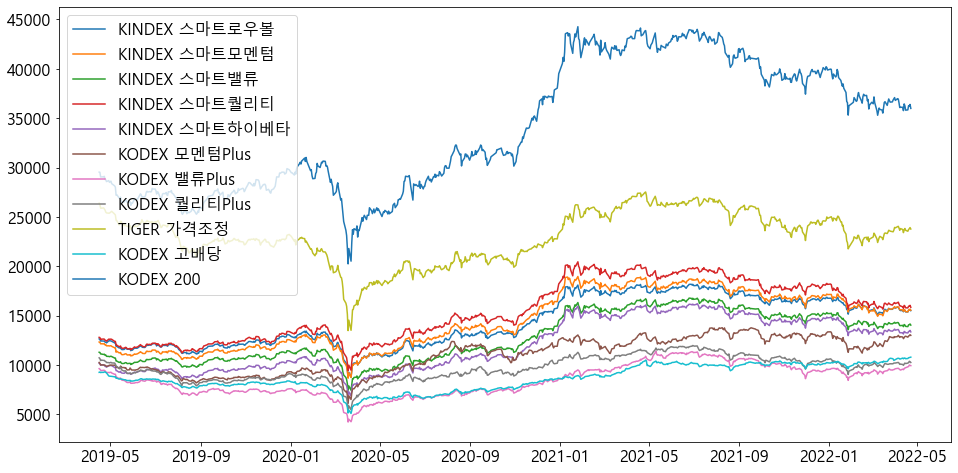

In [27]:
# 데이터 시각화
stocks = dict()
legend = []
for a, b in df[['종목명', '종목코드']].itertuples(index=False):
    price = stock.get_etf_ohlcv_by_date("20190416", "20220423", b)
    stocks[a] = price['종가'].values[:].tolist()
    legend.append(a)
prices = pd.DataFrame(stocks)
prices.index = price.index

# import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.plot(prices)
plt.legend(legend, loc='upper left')

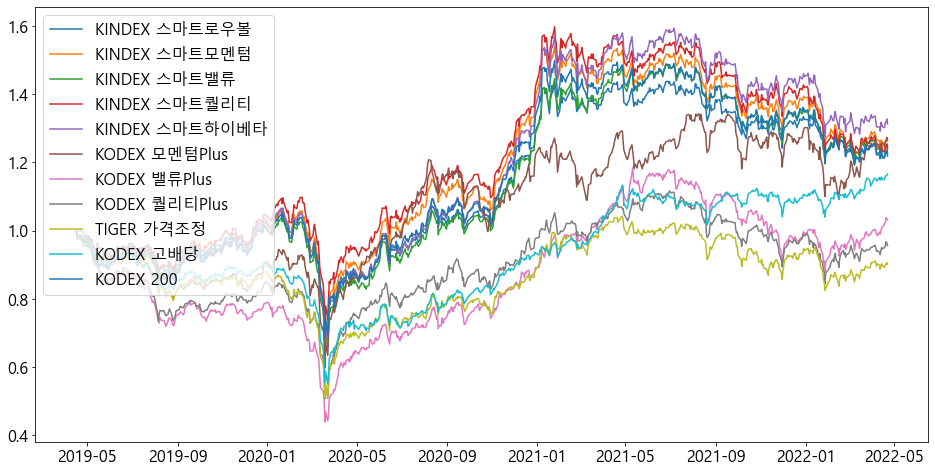

In [28]:
df_cumret = prices/prices.iloc[0]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.plot(df_cumret)
plt.legend(legend, loc='upper left')

## Weight 산정하기

In [29]:
# df와 df_cumret 세팅하면 그 이후 weight 계산하는 걸로 짜보자
# s_slow 계산

# 월봉으로 바꿔야 월 수익률 계산 가능
# 일별로 계산해보자
prices

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당,KODEX 200
날짜,,,,,,,,,,,
2019-04-16,12645,12330,11290,12800,10175,10260,9630,10725,26390,9260,29535
2019-04-17,12590,12305,11275,12775,10145,10150,9575,10655,26250,9290,29515
2019-04-18,12420,12145,11115,12580,9975,9995,9470,10445,25885,9230,29045
2019-04-19,12435,12150,11110,12615,10010,10005,9435,10495,25875,9255,29050
2019-04-22,12430,12140,11070,12630,10020,10005,9465,10465,25910,9255,29055
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18,15375,15385,13890,15785,13245,12820,9815,10195,23545,10660,35835
2022-04-19,15550,15575,14070,15955,13400,12935,9850,10240,23725,10730,36255
2022-04-20,15575,15555,14085,15955,13405,12970,9995,10375,23795,10750,36225


In [30]:
# prices.iloc[0].name

In [31]:
# prices.iloc[0].name.month

In [32]:
# prices.shape

In [33]:
# 시작시점 일종가 추가
# month_prices = pd.DataFrame(prices.iloc[0]).T

In [34]:
# month_prices

In [35]:
# 시작시점 일종가 추가
# month_prices = pd.DataFrame(prices.iloc[0]).T

# for i in range(len(prices) - 1):
#     if prices.iloc[i].name.month != prices.iloc[i + 1].name.month:
#         month_prices = pd.concat([month_prices, pd.DataFrame(prices.iloc[i]).T])

# # 마지막 달 추가
# if month_prices.iloc[-1].name.month != prices.iloc[-1].name.month:
#     month_prices = pd.concat([month_prices, pd.DataFrame(prices.iloc[-1]).T])

month_prices = prices

In [36]:
month_prices.head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당,KODEX 200
날짜,,,,,,,,,,,
2019-04-16,12645,12330,11290,12800,10175,10260,9630,10725,26390,9260,29535
2019-04-17,12590,12305,11275,12775,10145,10150,9575,10655,26250,9290,29515
2019-04-18,12420,12145,11115,12580,9975,9995,9470,10445,25885,9230,29045
2019-04-19,12435,12150,11110,12615,10010,10005,9435,10495,25875,9255,29050
2019-04-22,12430,12140,11070,12630,10020,10005,9465,10465,25910,9255,29055


In [37]:
month_return = month_prices.pct_change(1)

In [38]:
month_return_without_index = month_return.drop(labels='KODEX 200', axis=1)

In [39]:
month_return.head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당,KODEX 200
날짜,,,,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,-0.004350,-0.002028,-0.001329,-0.001953,-0.002948,-0.010721,-0.005711,-0.006527,-0.005305,0.003240,-0.000677
2019-04-18,-0.013503,-0.013003,-0.014191,-0.015264,-0.016757,-0.015271,-0.010966,-0.019709,-0.013905,-0.006459,-0.015924
2019-04-19,0.001208,0.000412,-0.000450,0.002782,0.003509,0.001001,-0.003696,0.004787,-0.000386,0.002709,0.000172
2019-04-22,-0.000402,-0.000823,-0.003600,0.001189,0.000999,0.000000,0.003180,-0.002859,0.001353,0.000000,0.000172


In [40]:
month_return_without_index.head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당
날짜,,,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,-0.004350,-0.002028,-0.001329,-0.001953,-0.002948,-0.010721,-0.005711,-0.006527,-0.005305,0.003240
2019-04-18,-0.013503,-0.013003,-0.014191,-0.015264,-0.016757,-0.015271,-0.010966,-0.019709,-0.013905,-0.006459
2019-04-19,0.001208,0.000412,-0.000450,0.002782,0.003509,0.001001,-0.003696,0.004787,-0.000386,0.002709
2019-04-22,-0.000402,-0.000823,-0.003600,0.001189,0.000999,0.000000,0.003180,-0.002859,0.001353,0.000000


In [41]:
s_slow = (1 + month_return_without_index).rolling(window=12, closed='left').apply(np.prod, raw=True) - 1
# https://stackoverflow.com/questions/15295434/how-to-calculate-rolling-cumulative-product-on-pandas-dataframe

In [42]:
s_fast = (month_return_without_index).rolling(window=1, closed='left').apply(np.prod, raw=True)

In [43]:
s_fast.head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당
날짜,,,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,-0.004350,-0.002028,-0.001329,-0.001953,-0.002948,-0.010721,-0.005711,-0.006527,-0.005305,0.003240
2019-04-19,-0.013503,-0.013003,-0.014191,-0.015264,-0.016757,-0.015271,-0.010966,-0.019709,-0.013905,-0.006459
2019-04-22,0.001208,0.000412,-0.000450,0.002782,0.003509,0.001001,-0.003696,0.004787,-0.000386,0.002709


In [44]:
n = month_return_without_index.shape[1]
rank_sum = n*(n + 1)/2

In [45]:
s_fast.abs().rank(axis=1, ascending=True).head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당
날짜,,,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,6.0,3.0,1.0,2.0,4.0,10.0,8.0,9.0,7.0,5.0
2019-04-19,4.0,3.0,6.0,7.0,9.0,8.0,2.0,10.0,5.0,1.0
2019-04-22,5.0,2.0,3.0,7.0,8.0,4.0,9.0,10.0,1.0,6.0


In [46]:
s_fast.apply(np.sign).head()

,KINDEX 스마트로우볼,KINDEX 스마트모멘텀,KINDEX 스마트밸류,KINDEX 스마트퀄리티,KINDEX 스마트하이베타,KODEX 모멘텀Plus,KODEX 밸류Plus,KODEX 퀄리티Plus,TIGER 가격조정,KODEX 고배당
날짜,,,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2019-04-19,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-04-22,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0


In [47]:
w_fast = s_fast.abs().rank(axis=1, ascending=True) * s_fast.apply(np.sign) / rank_sum

In [48]:
w_slow = s_slow.abs().rank(axis=1, ascending=True) * s_slow.apply(np.sign) / rank_sum

In [49]:
columns_name = []

In [50]:
ret_slow = (month_return_without_index * s_slow.apply(np.sign)).sum(axis=1, min_count = month_return_without_index.shape[1]) / month_return_without_index.shape[1]
columns_name.append('ret_slow')
df_ret = pd.DataFrame(ret_slow)
print(df_ret.shape)
len(columns_name)

(747, 1)


1

In [51]:
ret_dyn_slow = (month_return_without_index * w_slow).sum(axis=1, min_count = month_return_without_index.shape[1])
columns_name.append('ret_dyn_slow')
df_ret = pd.concat([df_ret, ret_dyn_slow], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 2)


2

In [52]:
ret_fast = (month_return_without_index * s_fast.apply(np.sign)).sum(axis=1,min_count = month_return_without_index.shape[1]) / month_return_without_index.shape[1]
columns_name.append('ret_fast')
df_ret = pd.concat([df_ret, ret_fast], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 3)


3

In [53]:
ret_dyn_fast = (month_return_without_index * w_fast).sum(axis=1, min_count = month_return_without_index.shape[1])
columns_name.append('ret_dyn_fast')
df_ret = pd.concat([df_ret, ret_dyn_fast], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 4)


4

In [54]:
ret_neutral = (ret_slow + ret_fast) / 2
columns_name.append('ret_neutral')
df_ret = pd.concat([df_ret, ret_neutral], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 5)


5

In [55]:
ret_dyn_neutral = (month_return_without_index * 1/2 * (w_fast + w_slow)).sum(axis=1, min_count = month_return_without_index.shape[1])
columns_name.append('ret_dyn_neutral')
df_ret = pd.concat([df_ret, ret_dyn_neutral], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 6)


6

In [56]:
ret_blended = (month_return_without_index * (3/4 * s_fast.apply(np.sign) + 1/4 * s_slow.apply(np.sign))).sum(axis=1, min_count = month_return_without_index.shape[1]) / month_return_without_index.shape[1]
columns_name.append('ret_blended')
df_ret = pd.concat([df_ret, ret_blended], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 7)


7

In [57]:
ret_dyn_blended = (month_return_without_index * (3/4 * w_fast + 1/4 * w_slow)).sum(axis=1, min_count = month_return_without_index.shape[1])
columns_name.append('ret_dyn_blended')
df_ret = pd.concat([df_ret, ret_dyn_blended], axis=1)
print(df_ret.shape)
len(columns_name)

(747, 8)


8

In [58]:
ret_index = month_return['KODEX 200']

In [59]:
columns_name

['ret_slow',
 'ret_dyn_slow',
 'ret_fast',
 'ret_dyn_fast',
 'ret_neutral',
 'ret_dyn_neutral',
 'ret_blended',
 'ret_dyn_blended']

In [60]:
df_ret.columns = columns_name

In [61]:
df_ret.head()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended
날짜,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,NaN,NaN,0.012611,0.012993,NaN,NaN,NaN,NaN
2019-04-19,NaN,NaN,-0.001187,-0.001885,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,-0.000283,-0.000638,NaN,NaN,NaN,NaN


In [62]:
df_ret.corrwith(ret_index)

ret_slow          -0.301589
ret_dyn_slow      -0.294904
ret_fast          -0.224768
ret_dyn_fast      -0.215232
ret_neutral       -0.323155
ret_dyn_neutral   -0.313866
ret_blended       -0.282016
ret_dyn_blended   -0.272326
dtype: float64

In [63]:
df_ret_with_index = pd.concat([df_ret, ret_index], axis=1)

In [64]:
df_ret_with_index.head()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000677
2019-04-18,NaN,NaN,0.012611,0.012993,NaN,NaN,NaN,NaN,-0.015924
2019-04-19,NaN,NaN,-0.001187,-0.001885,NaN,NaN,NaN,NaN,0.000172
2019-04-22,NaN,NaN,-0.000283,-0.000638,NaN,NaN,NaN,NaN,0.000172


In [65]:
df_ret_with_index.dropna()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,0.010342,0.008989,0.008190,0.008939,0.009266,0.008964,0.008728,0.008952,-0.007932
2019-05-08,0.001425,0.001335,0.001425,0.000934,0.001425,0.001135,0.001425,0.001034,-0.004620
2019-05-09,0.024310,0.025432,0.012836,0.009838,0.018573,0.017635,0.015705,0.013737,-0.029275
2019-05-10,-0.000033,0.000077,-0.000033,-0.000656,-0.000033,-0.000289,-0.000033,-0.000473,0.001839
2019-05-13,0.014384,0.014082,0.004946,0.002895,0.009665,0.008489,0.007306,0.005692,-0.011747
...,...,...,...,...,...,...,...,...,...
2022-04-18,0.000865,0.001314,0.000395,0.000770,0.000630,0.001042,0.000513,0.000906,0.000838
2022-04-19,-0.007006,-0.008869,-0.006123,-0.003724,-0.006565,-0.006297,-0.006344,-0.005010,0.011720
2022-04-20,0.002776,0.003126,0.003719,0.001552,0.003247,0.002339,0.003483,0.001945,-0.000827


In [66]:
(1 + df_ret_with_index.dropna()).cumprod()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,1.010342,1.008989,1.008190,1.008939,1.009266,1.008964,1.008728,1.008952,0.992068
2019-05-08,1.011781,1.010336,1.009627,1.009882,1.010704,1.010109,1.010165,1.009995,0.987485
2019-05-09,1.036378,1.036031,1.022587,1.019817,1.029476,1.027922,1.026030,1.023869,0.958576
2019-05-10,1.036344,1.036111,1.022553,1.019148,1.029442,1.027625,1.025996,1.023385,0.960338
2019-05-13,1.051251,1.050702,1.027611,1.022098,1.039392,1.036348,1.033492,1.029210,0.949057
...,...,...,...,...,...,...,...,...,...
2022-04-18,1.244053,1.274417,1.979850,1.990053,1.594582,1.621172,1.783831,1.804138,1.263353
2022-04-19,1.235337,1.263114,1.967727,1.982642,1.584114,1.610965,1.772515,1.795099,1.278160
2022-04-20,1.238767,1.267061,1.975045,1.985719,1.589258,1.614732,1.778689,1.798591,1.277102


In [67]:
list(df_ret_with_index.columns)

['ret_slow',
 'ret_dyn_slow',
 'ret_fast',
 'ret_dyn_fast',
 'ret_neutral',
 'ret_dyn_neutral',
 'ret_blended',
 'ret_dyn_blended',
 'KODEX 200']

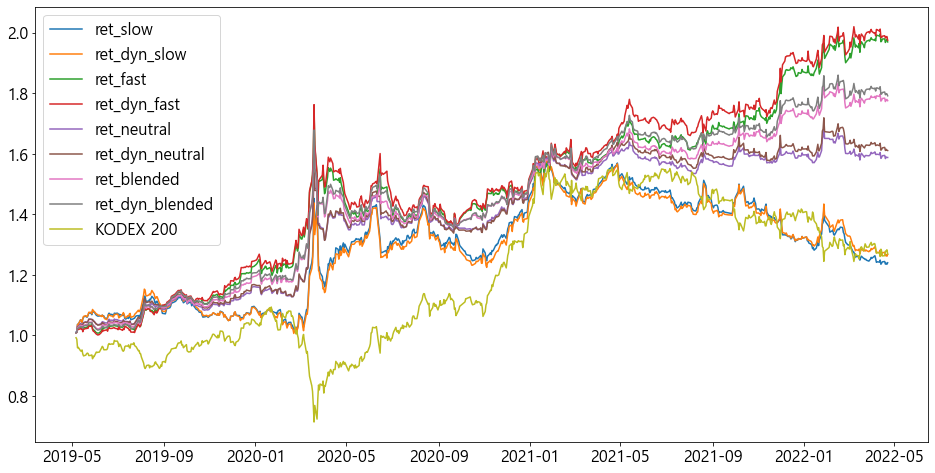

In [68]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.plot((1 + df_ret_with_index.dropna()).cumprod())
plt.legend(list(df_ret_with_index.columns), loc='upper left')

In [69]:
df_ret_with_index = df_ret_with_index.dropna()

In [70]:
df_ret_with_index.head()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,0.010342,0.008989,0.008190,0.008939,0.009266,0.008964,0.008728,0.008952,-0.007932
2019-05-08,0.001425,0.001335,0.001425,0.000934,0.001425,0.001135,0.001425,0.001034,-0.004620
2019-05-09,0.024310,0.025432,0.012836,0.009838,0.018573,0.017635,0.015705,0.013737,-0.029275
2019-05-10,-0.000033,0.000077,-0.000033,-0.000656,-0.000033,-0.000289,-0.000033,-0.000473,0.001839
2019-05-13,0.014384,0.014082,0.004946,0.002895,0.009665,0.008489,0.007306,0.005692,-0.011747


In [71]:
df_ret_with_index.rolling(window=1, closed='left').sum().head()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-08,0.010342,0.008989,0.008190,0.008939,0.009266,0.008964,0.008728,0.008952,-0.007932
2019-05-09,0.001425,0.001335,0.001425,0.000934,0.001425,0.001135,0.001425,0.001034,-0.004620
2019-05-10,0.024310,0.025432,0.012836,0.009838,0.018573,0.017635,0.015705,0.013737,-0.029275
2019-05-13,-0.000033,0.000077,-0.000033,-0.000656,-0.000033,-0.000289,-0.000033,-0.000473,0.001839


In [72]:
i = 1
df_weight = (df_ret_with_index.rolling(window=i, closed='left').sum().sub(df_ret_with_index.rolling(window=i, closed='left').sum()['KODEX 200'] ,axis='index') > 0)*1

In [73]:
for i in range(2, 13):
    df_weight = df_weight + (df_ret_with_index.rolling(window=i, closed='left').sum().sub(df_ret_with_index.rolling(window=i, closed='left').sum()['KODEX 200'] ,axis='index') > 0)*1
df_weight = df_weight / 12

In [74]:
df_weight # 그달의 w_fport
# 앞 12개월 나중에 없애는것이 편함

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2019-05-08,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0
2019-05-09,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.0
2019-05-10,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.0
2019-05-13,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-18,0.916667,0.916667,0.916667,0.666667,0.916667,0.916667,0.916667,0.750000,0.0
2022-04-19,0.916667,0.916667,0.833333,0.583333,0.833333,0.916667,0.833333,0.750000,0.0
2022-04-20,0.083333,0.083333,0.416667,0.416667,0.333333,0.333333,0.416667,0.416667,0.0


In [75]:
df_weight.head()

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2019-05-08,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0
2019-05-09,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.0
2019-05-10,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.0
2019-05-13,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.0


In [76]:
# 최종 return combining index
df_ret_combine_index = df_ret_with_index * df_weight + (1 - df_weight).mul(df_ret_with_index.loc[:, 'KODEX 200'], axis=0) 

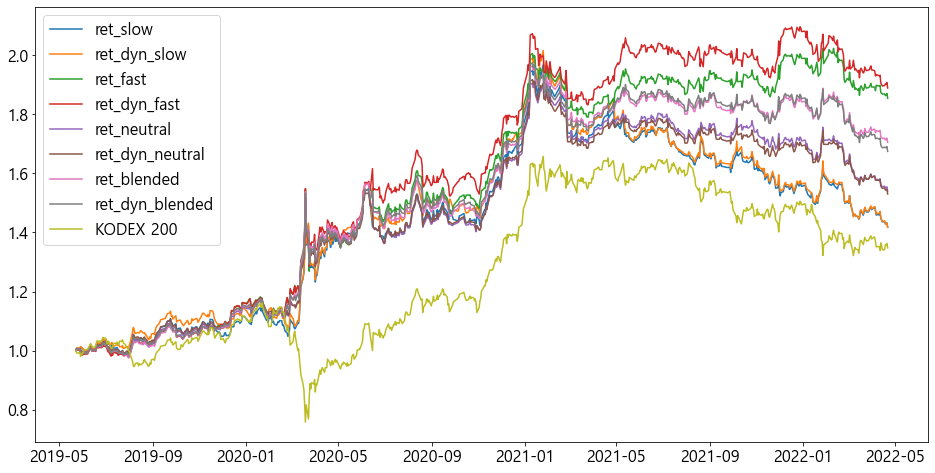

In [77]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.plot((1 + df_ret_combine_index.iloc[12:]).cumprod())
plt.legend(list(df_ret_combine_index.columns), loc='upper left')

# 통계 계산 및 시각화
### MDD 계산

In [78]:
def drawdown(returns):
    cumulative = (1 + returns).cumprod()
    highwatermark = cumulative.cummax()
    drawdown = (cumulative /  highwatermark) - 1
    return drawdown

def maximum_drawdown(returns):
    return np.min(drawdown(returns))

In [80]:
df_ret_combine_index.apply(drawdown)

,ret_slow,ret_dyn_slow,ret_fast,ret_dyn_fast,ret_neutral,ret_dyn_neutral,ret_blended,ret_dyn_blended,KODEX 200
날짜,,,,,,,,,
2019-05-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-05-08,-0.004116,-0.004124,-0.004116,-0.004157,-0.004116,-0.004140,-0.004116,-0.004149,-0.004620
2019-05-09,-0.024377,-0.024198,-0.026281,-0.026819,-0.025329,-0.025508,-0.025805,-0.026163,-0.033760
2019-05-10,-0.023039,-0.022833,-0.024946,-0.025636,-0.023993,-0.024235,-0.024469,-0.024935,-0.031983
2019-05-13,-0.028133,-0.028002,-0.032331,-0.033516,-0.030233,-0.030761,-0.031283,-0.032139,-0.043355
...,...,...,...,...,...,...,...,...,...
2022-04-18,-0.269737,-0.286194,-0.076164,-0.095074,-0.183229,-0.191117,-0.125066,-0.144711,-0.190352
2022-04-19,-0.273713,-0.291300,-0.079073,-0.092621,-0.186101,-0.194995,-0.127982,-0.145418,-0.180863
2022-04-20,-0.274096,-0.291653,-0.078091,-0.092472,-0.185669,-0.194812,-0.127138,-0.145138,-0.181541


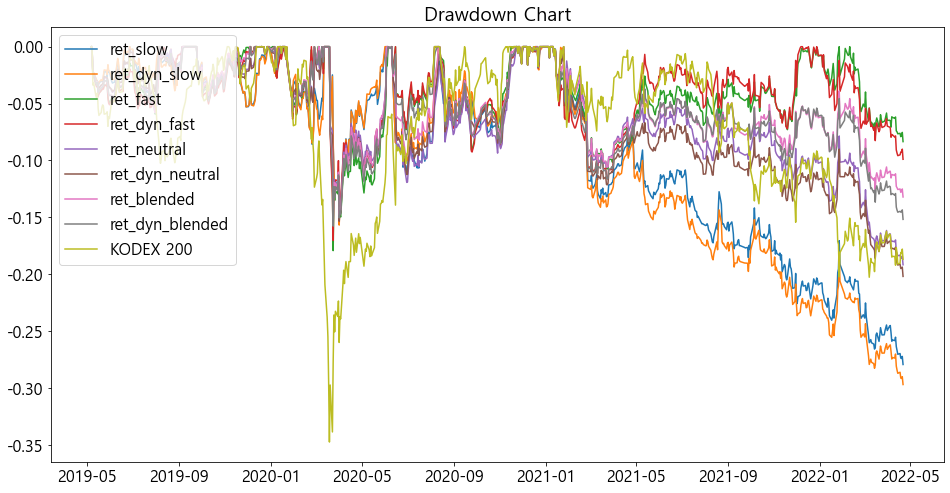

In [82]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

plt.title("Drawdown Chart")
plt.plot(df_ret_combine_index.apply(drawdown))
plt.legend(list(df_ret_combine_index.columns), loc='upper left')

In [83]:
# MDD 계산
df_ret_combine_index.apply(maximum_drawdown)

ret_slow          -0.279354
ret_dyn_slow      -0.296964
ret_fast          -0.179269
ret_dyn_fast      -0.170268
ret_neutral       -0.191690
ret_dyn_neutral   -0.201924
ret_blended       -0.156132
ret_dyn_blended   -0.157722
KODEX 200         -0.347518
dtype: float64

### Market - Portfolio 비중 계산

<AxesSubplot:xlabel='날짜'>

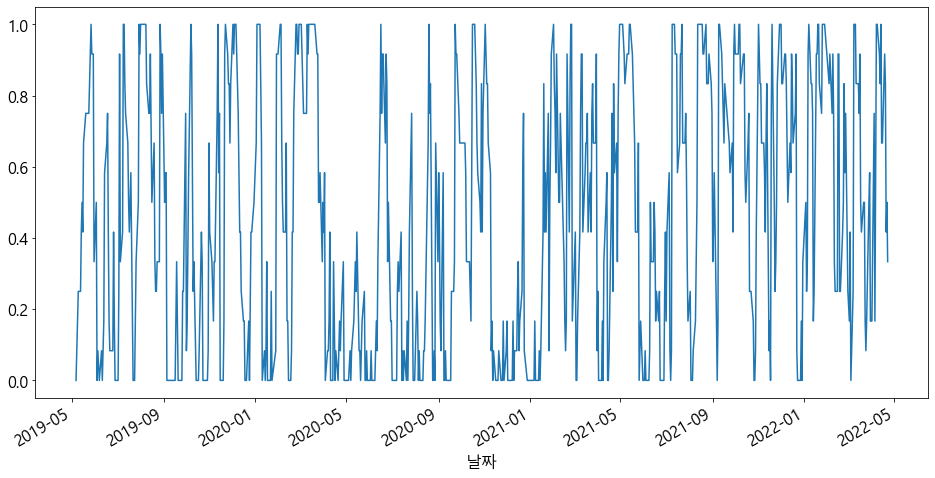

In [106]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

df_weight['ret_fast'].plot()

<AxesSubplot:xlabel='날짜'>

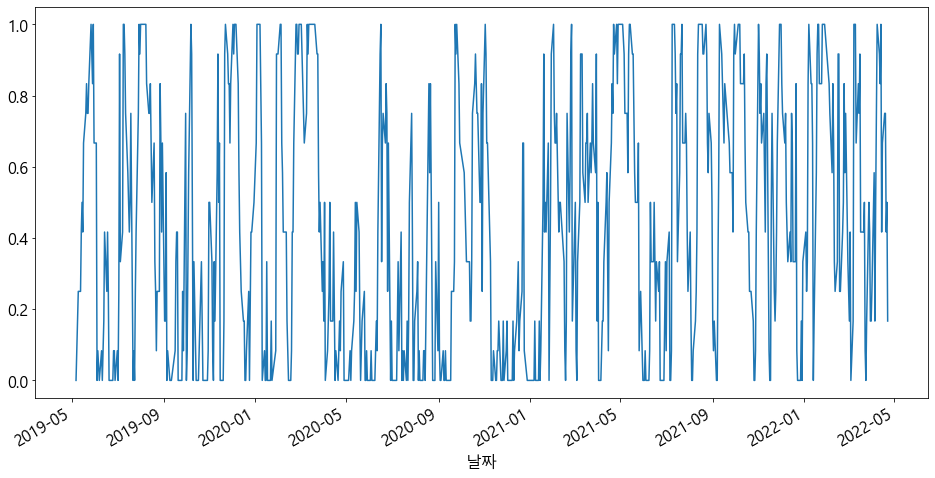

In [107]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))

df_weight['ret_dyn_blended'].plot() # ret_fast와 비중 큰 차이 없어보임

### 수익률 분포

<AxesSubplot:>

<Figure size 1728x1152 with 0 Axes>

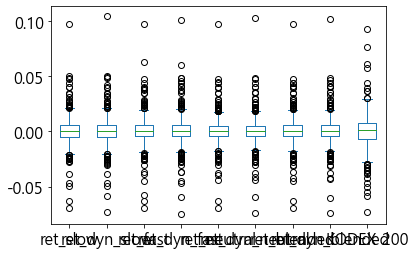

In [108]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(24, 16))
df_ret_combine_index.plot.box()

<Figure size 1728x1152 with 0 Axes>

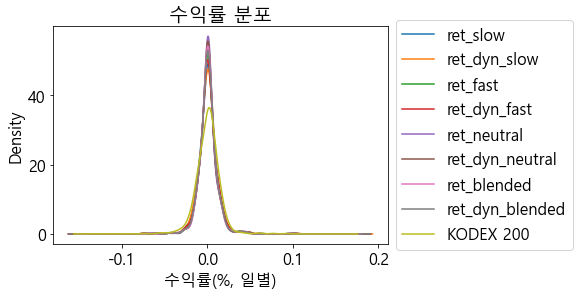

In [98]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.figure(figsize=(24, 16))

df_ret_combine_index.plot(kind='kde')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("수익률 분포")
plt.xlabel('수익률(%, 일별)')
plt.show()

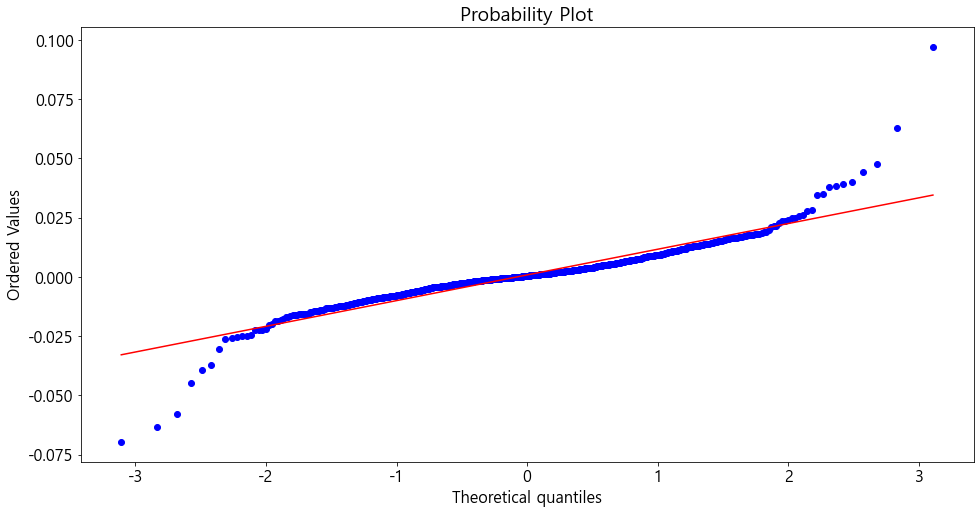

In [114]:
## QQplot 그리기
import scipy.stats as stats

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
stats.probplot(df_ret_combine_index['ret_fast'], dist=stats.norm, plot=ax)
plt.show()